# EDA

## 1. 전국 시도별 대피소 수용률 산출

In [ ]:
# 시도별 총인구 불러오기

In [11]:
df_people = pd.read_excel('/Users/parkSY/content/고령인구비율_시도_시_군_구__20230704111238.xlsx')

In [13]:
df_people = df_people.drop(0, axis=0)

In [14]:
df_people = df_people.drop('65세이상인구비율', axis=1)

In [15]:
df_people

,행정구역,65세이상인구,전체인구
1,서울특별시,1691311,9418885
2,부산광역시,726843,3309261
3,대구광역시,443872,2357032
4,인천광역시,477948,2978089
5,광주광역시,227279,1425739
6,대전광역시,237841,1445221
7,울산광역시,168916,1106446
8,세종특별자치시,41248,386050
9,경기도,2048245,13612597
10,강원특별자치도,357630,1533081


In [16]:
#전국 대피소 개수 불러오기

In [17]:
df_sos = pd.read_excel('/Users/parkSY/content/행정안전부_이재민임시주거시설정보_20200406.xls')

In [18]:
df_sos

,지역,이재민 개소,이재민 면적(m²),이재민 수용능력,지진겸용 개소,지진겸용 면적(m²),지진겸용 수용능력,마을회관 개소,마을회관 면적(m²),마을회관 수용능력
0,서울특별시,1166,1933105.25,656020,765,1467739.94,502040,3,441.93,158
1,부산광역시,494,576462.30,200407,298,447751.33,156857,61,11706.00,4380
2,대구광역시,276,373056.01,135515,239,357318.55,129633,22,4162.60,1591
3,인천광역시,524,523623.18,181341,279,336688.06,113157,41,6994.00,2633
4,광주광역시,175,201350.51,77539,163,175060.39,67550,1,115.00,44
5,대전광역시,206,187105.63,62282,100,118857.25,42010,1,663.00,200
6,울산광역시,290,179616.00,66955,255,170464.80,63509,1,551.00,211
7,세종특별자치시,155,80792.78,31007,95,73650.64,28285,26,2554.14,971
8,경기도,3187,2402924.62,900032,1175,1344591.89,504270,523,82223.66,31253
9,충청북도,823,522121.51,184465,191,232897.69,80394,77,9499.79,2998


In [19]:
df_sos = df_sos.drop(['이재민 개소', '지진겸용 개소', '마을회관 개소'], axis=1)

## 2. 전국 총인구수 대비 대피소 수용률
#### - 대피소 내 1인당 필요한 면적 크기는 1.43m2 으로 산정함.

In [20]:
adv = pd.merge(df_sos, df_people, left_on = '지역', right_on = '행정구역', how = 'inner')

In [21]:
adv = adv.drop('행정구역', axis=1)

In [22]:
adv['총인구수용률'] = ((adv['이재민 면적(m²)']+adv['지진겸용 면적(m²)']+adv['마을회관 면적(m²)'])/1.43)/adv['전체인구']

In [23]:
adv['실제수용_기존수용차'] = round((adv['이재민 면적(m²)']+adv['지진겸용 면적(m²)']+adv['마을회관 면적(m²)'])/1.43 -round((adv['이재민 수용능력']+adv['지진겸용 수용능력']+adv['마을회관 수용능력']))) 

In [24]:
adv['총인구수용률'] = round(adv['총인구수용률']*100,2)

In [25]:
adv['수용부족인원'] = round(adv['전체인구'] - round((adv['이재민 면적(m²)']+adv['지진겸용 면적(m²)']+adv['마을회관 면적(m²)'])/1.43) )

In [26]:
gdf2 = pd.merge(gdf, adv, left_on = '한글명', right_on = '지역', how = 'inner')
gdf2 = gdf2.drop('지역', axis=1)

In [32]:
gdf2['역총인구수용률'] = 1/gdf2['총인구수용률']

<AxesSubplot:>

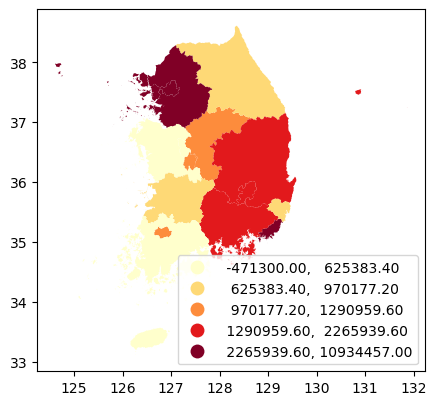

In [147]:
f, ax = plt.subplots(1,1,figsize=(5,5))
gdf2.plot(column='수용부족인원', ax=ax, legend=True, legend_kwds={'loc':'lower right'}, cmap='YlOrRd', scheme='quantiles')

### 전국 총인구 대비 수용률

In [237]:
df_diff = adv[['지역','전체인구','총인구수용률']]
df_diff = df_diff.sort_values(by= df_diff.columns[1], ascending=False)
df_diff

,지역,전체인구,총인구수용률
8,경기도,13612597,19.67
0,서울특별시,9418885,25.25
1,부산광역시,3309261,21.89
14,경상남도,3265018,49.93
3,인천광역시,2978089,20.37
13,경상북도,2590726,48.62
2,대구광역시,2357032,21.79
10,충청남도,2125833,122.17
12,전라남도,1812475,90.23
11,전라북도,1763004,49.77


## 3. 피난 약자를 고려한 대피소 수용률

In [78]:
df_handi = pd.read_excel('/Users/parkSY/content/시도별_장애유형별_성별_등록장애인수_20230704104222.xlsx')

/Users/parkSY/opt/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [113]:
df_kid = pd.read_excel('/Users/parkSY/content/202306_202306_주민등록 인구 기타현황(아동청소년청년 인구현황)_ChYouth.xlsx')

In [115]:
df_kid2 = df_kid.iloc[list(range(0,17)),[1,5]]

In [154]:
gdf3 = pd.merge(gdf, adv_hard, left_on = '한글명', right_on = '지역', how = 'inner')
gdf3 = gdf3.drop('지역', axis=1)

In [135]:
adv3['약자총인구']= adv3['65세이상인구']+adv3['장애인수']+adv3['아동전체']

In [136]:
adv3['약자수용률'] = ((adv3['이재민 면적(m²)']+adv3['지진겸용 면적(m²)']+adv3['마을회관 면적(m²)'])/1.43)/adv3['약자총인구']


In [137]:
adv3['약자수용률'] = round(adv3['약자수용률']*100,2)

In [138]:
gdf3 = pd.merge(gdf, adv3, left_on = '한글명', right_on = '지역', how = 'inner')
gdf3 = gdf3.drop('지역', axis=1)

In [149]:
gdf3['역약자수용률']= 1/gdf3['약자수용률']

<AxesSubplot:>

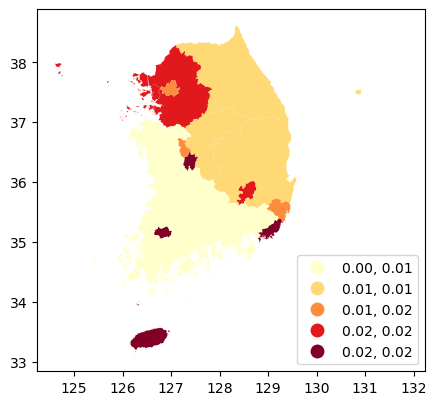

In [151]:
f, ax = plt.subplots(1,1,figsize=(5,5))
gdf3.plot(column='역약자수용률', ax=ax, legend=True, legend_kwds={'loc':'lower right'}, cmap='YlOrRd', scheme='quantiles')

### 전국 피난 약자수 대비 수용률

In [143]:
df_diff2 = adv3[['지역','약자총인구','약자수용률']]
df_diff2 = df_diff2.sort_values(by= df_diff2.columns[1], ascending=False)
df_diff2

,지역,약자총인구,약자수용률
8,경기도,4716189,56.79
0,서울특별시,3193370,74.48
14,경상남도,1320208,123.49
1,부산광역시,1314996,55.09
13,경상북도,1146507,109.87
3,인천광역시,1052886,57.60
2,대구광역시,895729,57.35
10,충청남도,890917,291.51
12,전라남도,841000,194.46
11,전라북도,785760,111.67
